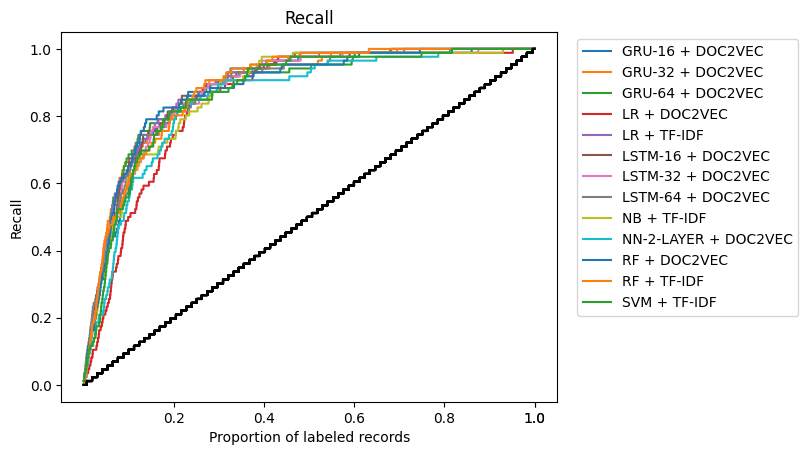

In [119]:
import matplotlib.pyplot as plt

from asreview import open_state
from asreviewcontrib.insights.plot import plot_recall

import glob

files = glob.glob("./simulation_output/*.asreview")
files.sort()

fig, ax = plt.subplots()

for state_file in files:
  with open_state(state_file) as s:
    plot_recall(ax, s)

for i in range(len(files)):
  ax.lines[i*2].set_label(files[i].split("/")[-1].replace(".asreview", "").replace("_", " + ").upper())

ax.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))


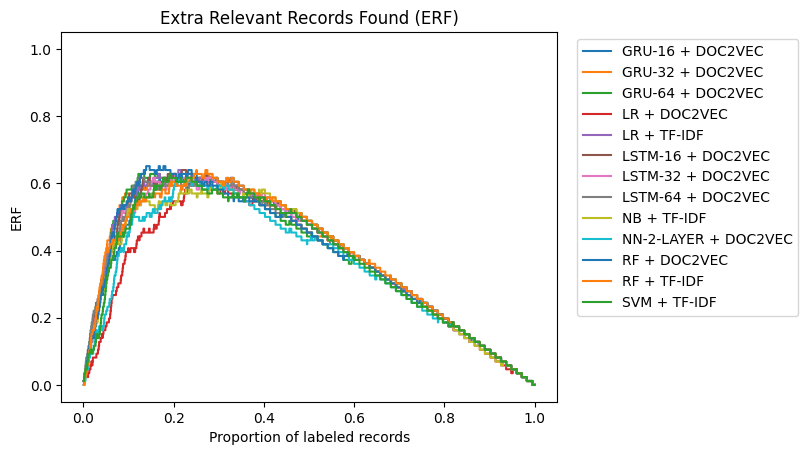

In [118]:
import matplotlib.pyplot as plt

from asreview import open_state
from asreviewcontrib.insights.plot import plot_erf

import glob

files = glob.glob("./simulation_output/*.asreview")
files.sort()

fig, ax = plt.subplots()

for state_file in files:
  with open_state(state_file) as s:
    plot_erf(ax, s)

for i in range(len(files)):
  ax.lines[i].set_label(files[i].split("/")[-1].replace(".asreview", "").replace("_", " + ").upper())

ax.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

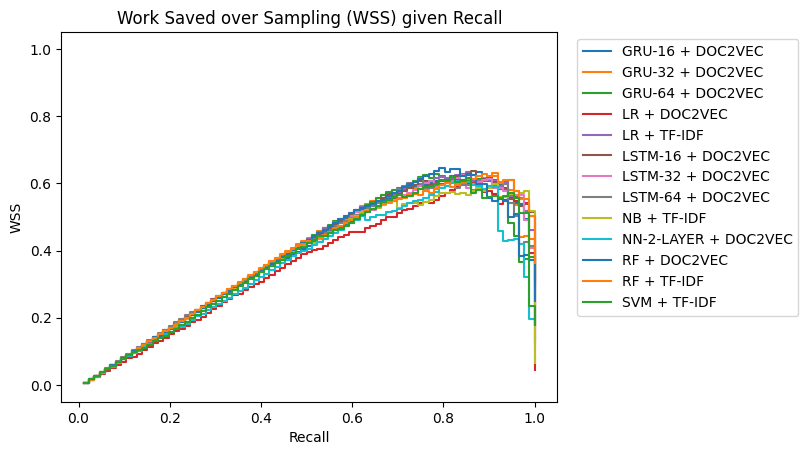

In [117]:
import matplotlib.pyplot as plt

from asreview import open_state
from asreviewcontrib.insights.plot import plot_wss

import glob

files = glob.glob("./simulation_output/*.asreview")
files.sort()

fig, ax = plt.subplots()

for state_file in files:
  with open_state(state_file) as s:
    plot_wss(ax, s)

for i in range(len(files)):
  ax.lines[i].set_label(files[i].split("/")[-1].replace(".asreview", "").replace("_", " + ").upper())

ax.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

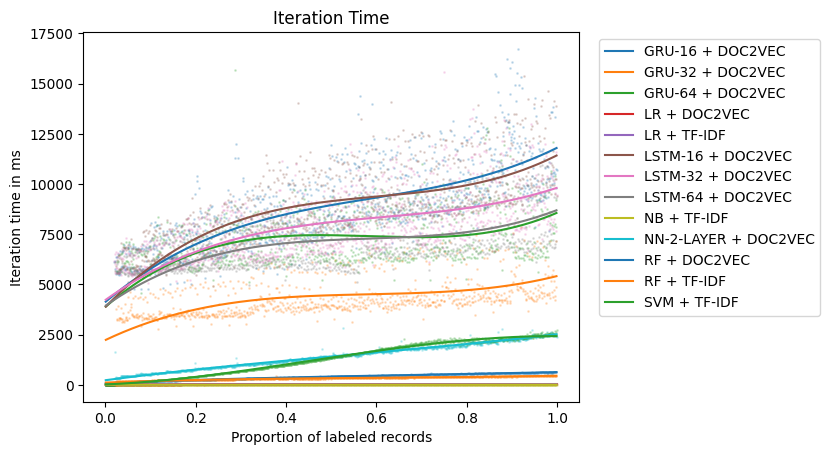

In [107]:
from asreview import open_state
import pandas as pd
from scipy.interpolate import make_interp_spline, interp1d
import numpy as np

import glob

files = glob.glob("./simulation_output/*.asreview")
files.sort()

fig, ax = plt.subplots()

for state_file in files:
  with open_state(state_file) as s:
    df = s.get_dataset()
    iter_time = pd.to_datetime(df.labeling_time.sort_values(ascending=True)).diff().map(lambda x: x.total_seconds() * 1000)
    ax.set_title("Iteration Time")
    x = np.arange(1, len(iter_time)) / len(iter_time)
    y = np.array(iter_time[1:])
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    cubic_interpolation_model = interp1d(x, y, kind = "cubic")
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = cubic_interpolation_model(X_)
    ax.plot(x, p(x))
    ax.scatter(x, y, s=1, alpha=0.2)
    ax.set(xlabel='Proportion of labeled records', ylabel='Iteration time in ms')

for i in range(len(files)):
  ax.lines[i].set_label(files[i].split("/")[-1].replace(".asreview", "").replace("_", " + ").upper())

ax.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

In [62]:
df

,record_id,label,classifier,query_strategy,balance_strategy,feature_extraction,training_set,labeling_time,notes
0,462,1,None,prior,None,None,-1,2024-04-26 01:30:19.797323,None
1,25,1,None,prior,None,None,-1,2024-04-26 01:30:19.797323,None
2,863,1,None,prior,None,None,-1,2024-04-26 01:30:19.797323,None
3,414,1,None,prior,None,None,-1,2024-04-26 01:30:19.797323,None
4,793,1,None,prior,None,None,-1,2024-04-26 01:30:19.797323,None
...,...,...,...,...,...,...,...,...,...
955,584,0,svm,max,double,tfidf,955,2024-04-26 01:51:11.009538,None
956,968,0,svm,max,double,tfidf,956,2024-04-26 01:51:13.696464,None
957,1071,0,svm,max,double,tfidf,957,2024-04-26 01:51:16.237863,None
958,993,0,svm,max,double,tfidf,958,2024-04-26 01:51:18.857515,None


model             : gru16
query_strategy    : max
balance_strategy  : double
feature_extraction: doc2vec
n_instances       : 1
stop_if           : min
n_prior_included  : 10
n_prior_excluded  : 10
model_param       : {}
query_param       : {}
feature_param     : {'vector_size': 40, 'epochs': 33, 'min_count': 1, 'n_jobs': 1, 'window': 7, 'dm_concat': 0, 'dm': 2, 'dbow_words': 0, 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

model             : gru
query_strategy    : max
balance_strategy  : double
feature_extraction: doc2vec
n_instances       : 1
stop_if           : min
n_prior_included  : 10
n_prior_excluded  : 10
model_param       : {}
query_param       : {}
feature_param     : {'vector_size': 40, 'epochs': 33, 'min_count': 1, 'n_jobs': 1, 'window': 7, 'dm_concat': 0, 'dm': 2, 'dbow_words': 0, 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

model             : gru6

,Model Name,WSS@95,MIT,ATD,RRF@10,RRF@5,RRF@2,RRF@1
0,GRU-16 + DOC2VEC,0.610773,8592.271,138.453488,0.476744,0.325581,0.174419,0.081395
1,GRU-32 + DOC2VEC,0.581234,4138.341,133.383721,0.558140,0.395349,0.139535,0.093023
2,GRU-64 + DOC2VEC,0.480452,6732.145,136.837209,0.581395,0.372093,0.174419,0.081395
3,LR + DOC2VEC,0.556038,29.985,172.860465,0.395349,0.174419,0.069767,0.023256
4,LR + TF-IDF,0.562120,29.198,130.569767,0.546512,0.372093,0.139535,0.081395
5,LSTM-16 + DOC2VEC,0.552563,8601.596,132.581395,0.546512,0.348837,0.151163,0.081395
6,LSTM-32 + DOC2VEC,0.570808,7639.604,140.302326,0.523256,0.360465,0.151163,0.069767
7,LSTM-64 + DOC2VEC,0.540400,6820.541,139.674419,0.523256,0.348837,0.197674,0.104651
8,NB + TF-IDF,0.569070,11.245,149.197674,0.511628,0.325581,0.151163,0.081395
9,NN-2-LAYER + DOC2VEC,0.432667,1427.572,171.081395,0.441860,0.209302,0.093023,0.046512


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'GRU-16 + DOC2VEC'),
  Text(1, 0, 'GRU-32 + DOC2VEC'),
  Text(2, 0, 'GRU-64 + DOC2VEC'),
  Text(3, 0, 'LR + DOC2VEC'),
  Text(4, 0, 'LR + TF-IDF'),
  Text(5, 0, 'LSTM-16 + DOC2VEC'),
  Text(6, 0, 'LSTM-32 + DOC2VEC'),
  Text(7, 0, 'LSTM-64 + DOC2VEC'),
  Text(8, 0, 'NB + TF-IDF'),
  Text(9, 0, 'NN-2-LAYER + DOC2VEC'),
  Text(10, 0, 'RF + DOC2VEC'),
  Text(11, 0, 'RF + TF-IDF'),
  Text(12, 0, 'SVM + TF-IDF')])

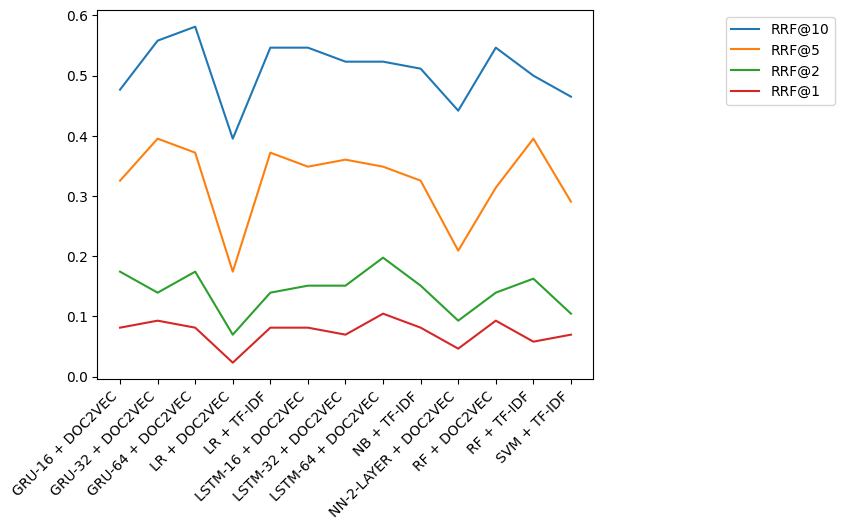

In [122]:
import pandas as pd
from asreviewcontrib.insights.metrics import wss, erf, average_time_to_discovery
from asreview import open_state
import matplotlib
import matplotlib.pyplot as plt

def all_metrics(s, model_name):
  df = s.get_dataset()
  mit = pd.to_datetime(df.labeling_time.sort_values(ascending=True).unique()).to_series().diff().median().total_seconds() * 1000
  return [model_name, wss(s, 0.95), mit, average_time_to_discovery(s), erf(s, 0.1), erf(s, 0.05), erf(s, 0.02), erf(s, 0.01)]

import glob

files = glob.glob("./simulation_output/*.asreview")
files.sort()

metrics = []

for state_file in files:
  model_name = state_file.split("/")[-1].replace(".asreview", "").replace("_", " + ").upper()
  with open_state(state_file) as s:
    print(s.settings)
    metrics.append(all_metrics(s, model_name))


df = pd.DataFrame(metrics, columns=["Model Name", "WSS@95", "MIT", "ATD", "RRF@10", "RRF@5", "RRF@2", "RRF@1"])
display(df)

fig, ax = plt.subplots()
ax.plot(df['Model Name'], df["RRF@10"], label="RRF@10")
ax.plot(df['Model Name'], df["RRF@5"], label="RRF@5")
ax.plot(df['Model Name'], df["RRF@2"], label="RRF@2")
ax.plot(df['Model Name'], df["RRF@1"], label="RRF@1")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.xticks(rotation=45, ha='right')